Importing all the required dependencies

In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [190]:
df=pd.read_csv("/content/drive/MyDrive/dataset_diabetes_diabetic_data.csv")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes


In [192]:
df.nunique()

patient_nbr                 52500
race                            6
gender                          3
age                            10
admission_type_id               8
discharge_disposition_id       26
admission_source_id            13
time_in_hospital               14
num_lab_procedures            116
num_procedures                  7
num_medications                74
number_outpatient              29
number_emergency               19
number_inpatient               21
diag_1                        685
diag_2                        702
diag_3                        727
number_diagnoses               16
change                          2
diabatic                        2
dtype: int64

In [193]:
df.shape

(70180, 20)

In [194]:
df.drop(['patient_nbr'],axis='columns',inplace=True)

In [195]:
df.tail()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
70175,AfricanAmerican,Female,[80-90),1,3,7,7,60,0,17,0,1,1,491,707,250,9,No,No
70176,AfricanAmerican,Female,[70-80),1,1,7,3,57,4,11,0,0,1,786,414,424,9,No,No
70177,AfricanAmerican,Male,[90-100),1,3,7,4,21,1,8,0,0,1,820,427,276,9,No,No
70178,Caucasian,Female,[80-90),1,1,7,1,49,0,12,0,0,0,427,428,428,9,No,No
70179,Caucasian,Male,[70-80),1,1,7,6,13,3,3,0,0,0,530,530,787,9,No,No


Classifying data as categorical and numerical

In [196]:
num=pd.DataFrame()
cat=pd.DataFrame()

In [197]:
for i in df.columns:
  if df[i].dtype==object:
    cat[i]=df[i]
  else:
    num[i]=df[i]

In [198]:
num.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,6,25,1,1,41,0,1,0,0,0,1
1,1,1,7,3,59,0,18,0,0,0,9
2,1,1,7,2,11,5,13,2,0,1,6
3,1,1,7,2,44,1,16,0,0,0,7
4,1,1,7,1,51,0,8,0,0,0,5


In [199]:
cat.head()

,race,gender,age,diag_1,diag_2,diag_3,change,diabatic
0,Caucasian,Female,[0-10),250.83,?,?,No,No
1,Caucasian,Female,[10-20),276,250.01,255,Ch,Yes
2,AfricanAmerican,Female,[20-30),648,250,V27,No,Yes
3,Caucasian,Male,[30-40),8,250.43,403,Ch,Yes
4,Caucasian,Male,[40-50),197,157,250,Ch,Yes


Treating NULL values

In [200]:
df[df['diag_1']=='?']['diag_1'].count()

19

In [201]:
df[df['diag_2']=='?']['diag_2'].count()

304

In [202]:
df[df['diag_3']=='?']['diag_3'].count()

1237

In [203]:
for i in df.columns:
  if  df[df[i]=="?"][i].count()>0:
    print(i)


race
diag_1
diag_2
diag_3


In [204]:
for i,j in df.iterrows():
  count=0
  if(j['race']=="?")& (j['diag_1']=="?")&(j['diag_2']=="?")&(j['diag_3']=="?"):
    count +=1
print(count)

0


In [205]:
df.drop(['diag_3','diag_1','diag_2'],axis='columns',inplace=True)

In [206]:
# Dropping Duplicates
df.drop_duplicates(keep='first',inplace=True)

In [207]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,No,No
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,No,Yes
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,Ch,Yes


In [208]:
df.shape

(70158, 16)

In [209]:
corr=num.corr()

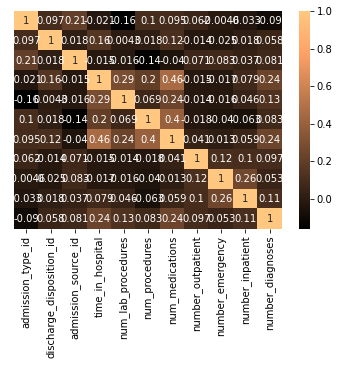

In [212]:
sns.heatmap(corr,yticklabels=False,cmap='copper',annot=True)

In [213]:
df.drop(df[df['race'] =='?'].index, inplace = True)

In [214]:
df.shape

(68697, 16)

In [215]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,No,No
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,No,Yes
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,Ch,Yes


Label Encoding

In [216]:
lr=LabelEncoder()

In [217]:
df['race']=lr.fit_transform(df['race'])
df['gender']=lr.fit_transform(df['gender'])
df['age']=lr.fit_transform(df['age'])
df['change']=lr.fit_transform(df['change'])
df['diabatic']=lr.fit_transform(df['diabatic'])

Splitting train-test data

In [218]:
X=df.iloc[:,:-1]
X.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change
0,2,0,0,6,25,1,1,41,0,1,0,0,0,1,1
1,2,0,1,1,1,7,3,59,0,18,0,0,0,9,0
2,0,0,2,1,1,7,2,11,5,13,2,0,1,6,1
3,2,1,3,1,1,7,2,44,1,16,0,0,0,7,0
4,2,1,4,1,1,7,1,51,0,8,0,0,0,5,0


In [219]:
Y=df["diabatic"]

In [221]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

# Using Decision Tree Classifier

In [222]:
model=DecisionTreeClassifier(random_state=7,max_depth=2)

In [223]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=7)

In [224]:
y_pred=model.score(x_test,y_test)

In [225]:
y_pred

0.713391557496361

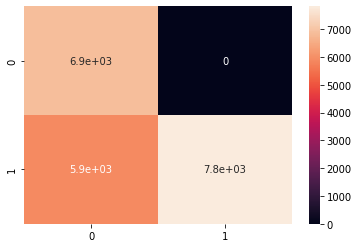

In [226]:
sns.heatmap(confusion_matrix(y_test,model.predict(x_test)),annot=True)

Using Grid Search with Decision Tree

In [227]:
param_grid={'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]}

In [228]:
tree_clas=DecisionTreeClassifier(random_state=1024)

In [229]:
grid_tree=GridSearchCV(estimator=tree_clas,param_grid=param_grid,cv=26)

In [230]:
grid_tree.fit(x_train,y_train)

GridSearchCV(cv=26, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19]})

In [231]:
final_grid_tree=grid_tree.best_estimator_
final_grid_tree

DecisionTreeClassifier(max_depth=8, random_state=1024)

In [232]:
#Training the model
tree_clas = DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=1024, splitter='best')
tree_clas.fit(x_train, y_train)
y_predict = tree_clas.predict(x_test)

In [233]:
tree_clas.score(x_test,y_test)

0.7255215914604561

AUC ROC with Decision Tree

In [234]:
predictions = tree_clas.predict_proba(x_test)

In [235]:
print( roc_auc_score(y_test, predictions[:,1]))

0.786114348147069


In [236]:
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

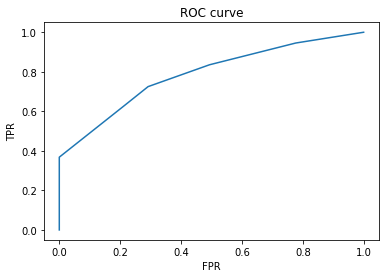

In [237]:
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

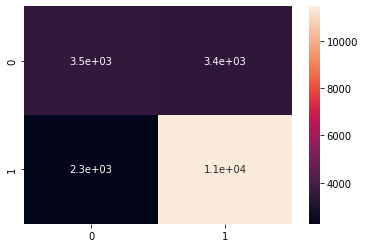

In [238]:
sns.heatmap(confusion_matrix(y_test,tree_clas.predict(x_test)),annot = True)

Random Forest Classifier

In [239]:
RF_model=RandomForestClassifier(max_depth=5, random_state=42)

In [240]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [241]:
accuracy_score(model.predict(x_test),y_test)

0.713391557496361

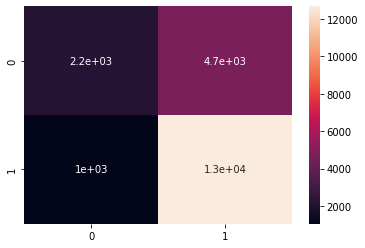

In [242]:
sns.heatmap(confusion_matrix(y_test,RF_model.predict(x_test)),annot = True)

AUC ROC Curve with Random Forest

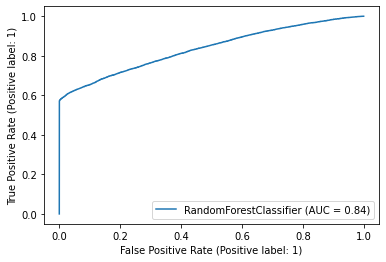

In [243]:
RF_roc_disp = RocCurveDisplay.from_estimator(RF_model, x_test, y_test)
plt.show()

In [244]:
y_score = roc_auc_score(y_test, RF_model.predict_proba(x_test)[:,1])
y_score

0.8366352369898314

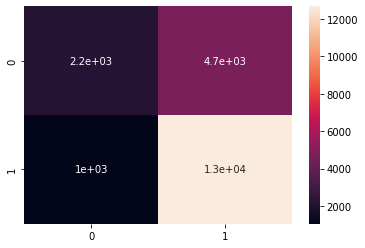

In [245]:
sns.heatmap(confusion_matrix(y_test,RF_model.predict(x_test)),annot = True)